In [2]:
import numpy as np
import requests
from IPython.core.display import HTML
%config InlineBackend.figure_format='svg'
def css_style(url):
    style = requests.get(url)
    return HTML(style.text)
css_style('https://raw.githubusercontent.com/saadtony/NumericalMethods/master/styles/custom.css')

# Using SciPy's ODEINT

```odeint``` solves an equation of the form:

$$\frac{dy}{dt} = rhs(y, t)$$

and accepts arguments in the form:

```odeint(rhs, y, t, ...)```

In [3]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint

Let's take an initial value heat-transfer problem:

$$\frac{dT}{dt} =-\frac{hA}{mc_{p}} (T-T_{\infty })$$

In [23]:
# RHS of convection ODE
def rhs_conv(T, t, h, Tinf):
    R = 0.1    # m
    L = 0.3    # m
    A = 2*np.pi*R*L + 2*np.pi*R**2
    m = 1      # kg
    cp = 4200  # J/(kg-K)
    rhs = -(h*A)/(m*cp) * (T - Tinf)
    return rhs

Let's do the same thing for radiative heat transfer:

$$\frac{dT}{dt} =-\frac{\sigma \epsilon A}{mc_{p}} (T^{4}-T^{4}_{\infty })$$

In [59]:
def rhs_rad(T, t, Tinf):
    σ = 5.6704e-8       # J/(m^2-K-s)
    ε = 1
    R = 0.1    # m
    L = 0.3    # m
    A = 2*np.pi*R*L + 2*np.pi*R**2
    m = 1      # kg
    cp = 4200  # J/(kg-K)
    rhs = -σ*ε*A/(m*cp)*(T**4 - Tinf**4)
    
    return rhs

In [34]:
tend = 20*60     # 20 minutes * 60 seconds/min
time = np.linspace(0, tend, 100)
T0 = 300         # initial temp
Tconv = odeint(rhs_conv, T0, time, args=(500, 400))
Trad = odeint(rhs_rad, T0, time, args=(450,))

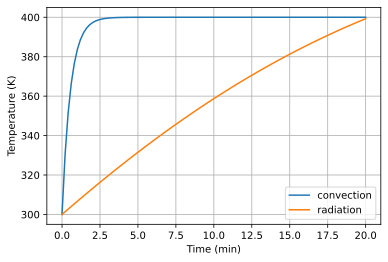

In [35]:
plt.plot(time/60, Tconv, label='convection')
plt.plot(time/60, Trad, label='radiation')
plt.xlabel('Time (min)')
plt.ylabel('Temperature (K)')
plt.grid(True)
plt.legend()

# Building our own integrator

Let's first use the forward Euler in time to integrate a differential equation of the form:

$$\frac{d\phi }{dt} \bigg|_{t_{0}}=R(t_{0},\phi_{0} )$$

$$\frac{d\phi }{dt} \bigg|_{t_{0}}=\frac{\phi_{1} -\phi_{0} }{h} +\vartheta (h) $$

Therefore we can explicitly solve for the next time step as:

$$\phi_1 = \phi_0 + hR(t_0, \phi_0)$$

In [45]:
def forward_euler(rhs, f0, t):
    n = len(t)
    dt = t[1] - t[0]
    f = np.empty(n)
    f[0] = f0
    fold = f0
    for i in range(1,len(t)):
        f[i] = fold + dt * rhs(fold, t[i-1])
        fold = f[i]
    return f

In [37]:
def rhs_conv1(T, t):
    h = 500
    Tinf = 380 # K
    R = 0.1    # m
    L = 0.3    # m
    A = 2*np.pi*R*L + 2*np.pi*R**2
    m = 1      # kg
    cp = 4200  # J/(kg-K)
    rhs = -(h*A)/(m*cp) * (T - Tinf)
    return rhs

In [39]:
def rhs_rad1(T, t):
    Tinf = 500 # K
    σ = 5.6704e-8 # J/(m^2-K-s)
    ε = 1
    R = 0.1    # m
    L = 0.3    # m
    A = 2*np.pi*R*L + 2*np.pi*R**2
    m = 1      # kg
    cp = 4200  # J/(kg-K)
    rhs = -σ*ε*A/(m*cp)*(T**4 - Tinf**4)
    
    return rhs

In [46]:
t = np.linspace(0, 20*60, 100)
T0 = 311
Tconv = forward_euler(rhs_conv1, T0, t)

In [48]:
Trad = forward_euler(rhs_rad1, T0, t)

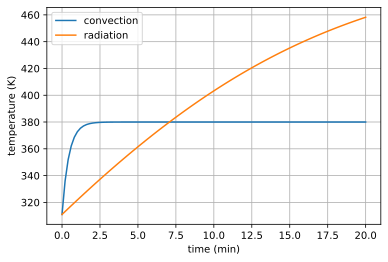

In [51]:
plt.plot(t/60, Tconv, label='convection')
plt.plot(t/60, Trad, label='radiation')
plt.xlabel('time (min)')
plt.ylabel('temperature (K)')
plt.grid()
plt.legend()

# Interactive

In [52]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [57]:
def plot_lobster_temps(h, TinfConv, TinfRad):
    Tconv = odeint(rhs_conv, T0, time, args=(h, TinfConv))
    Trad = odeint(rhs_rad, T0, time, args=(TinfRad,))
    plt.plot(time/60, Tconv, label='convection')
    plt.plot(time/60, Trad, label='radiation')
    plt.xlabel('time (min)')
    plt.ylabel('temperature (K)')
    plt.grid()
    plt.legend()

In [60]:
h = widgets.FloatSlider(value=100, min=0.1, max=10000,step=10,description='h:', continuous_update=False)
style = {'description_width': 'initial'}
TinfConv = widgets.FloatSlider(value=350, min=350, max=600,step=10,description='$T_{inf}$', continuous_update=False,
                              style=style)
TinfRad = widgets.FloatSlider(value=350, min=170, max=600,step=10,description='$T_{inf,rad}$', continuous_update=False,
                              style=style, readout_format='.1f')

ui1 = widgets.HBox([h,TinfConv])
ui2 = widgets.HBox([TinfRad])

out = widgets.interactive_output(plot_lobster_temps, {'h':h, 'TinfConv':TinfConv, 'TinfRad':TinfRad})
display(ui1, ui2, out)

Output()

In [56]:
widgets.FloatSlider(
    value=7.5,
    min=0,
    max=10.0,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',)

FloatSlider(value=7.5, continuous_update=False, description='Test:', max=10.0, readout_format='.1f')